# Exercício de Classificação - Predição na qualidade do leite

Feature:
- pH
- Temprature
- Taste
- Odor
- Fat
- Turbidity
- Colour

Target:
- Grade


To-Dos do exercício:

- Transformar a variável target (Grade) de string para numérica (0,1,2). Lembrando que é um problema multiclasse (Uma única coluna de target) e não multi-label (Múltiplas colunas de target).
- Separação de Treino X Teste:
> Separa o conjunto de treino e teste com os dados resultante em 50% para cada.
- Normalização dos dados:
> Utilizando a função StandardScaler já fornecida, normaliza os dados de treino (Somente é usado o fit em cima dos dados de treino) e teste das colunas pH, Temperature e Colour.
- Treinar o modelo
- Validação do modelo:
> Analisar a acurácia do modelo com dados de teste
> Verificar outras métricas de performance do modelo



Dataset: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

# Importação das bibliotecas que irá utilizar

In [37]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score,recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve 


ImportError: ignored

In [11]:
df = pd.read_csv('/content/Dinâmica_classificação_aluno.csv')

In [12]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [13]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [14]:
df.shape

(1059, 8)

# Análise primária (Estatística/ Valores nulos/ Dados coerentes) e EDA

In [15]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [18]:
px.box(df, x='pH', y='Grade')

In [19]:
px.box(df, x='Temprature', y='Grade')

In [26]:
px.box(df, x='Colour', y='Grade')

In [24]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [20]:
df['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

<Axes: xlabel='pH', ylabel='Count'>

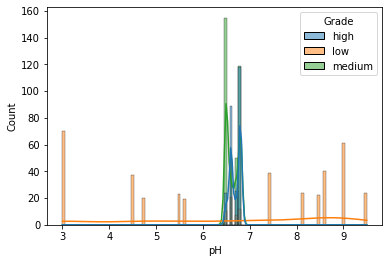

In [32]:
sns.histplot(data=df,kde=True,x='pH',hue='Grade') 

array([[<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'Temprature'}>],
       [<Axes: title={'center': 'Colour'}>, <Axes: >]], dtype=object)

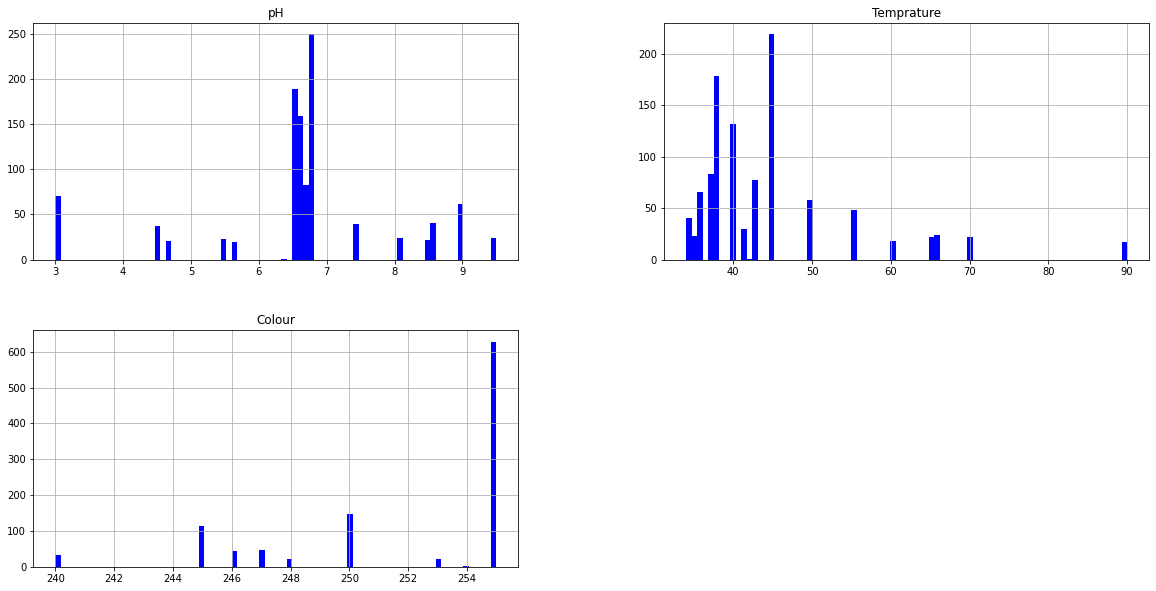

In [34]:
df[[
	'pH','Temprature','Colour'
]].hist(bins=80, alpha=1.0, color='blue', figsize=(20,10))

In [21]:
df['Odor'].value_counts()

0    601
1    458
Name: Odor, dtype: int64

In [25]:
df['Fat '].value_counts()

1    711
0    348
Name: Fat , dtype: int64

In [27]:
df['Turbidity'].value_counts()

0    539
1    520
Name: Turbidity, dtype: int64

# Limpeza e tratamento dos dados

In [38]:
df['Grade'] = df['Grade'].replace({'low':0,'medium':1,'high':2})

In [39]:
x = df.drop(columns = ['Grade'])
y = df['Grade']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [41]:
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
102,6.7,45,1,1,0,0,247
613,6.5,38,1,1,1,1,255
15,6.5,38,1,0,0,0,255
186,6.7,45,1,1,0,0,247
289,6.6,35,0,1,1,1,255


In [42]:
y_train.head() 

102    1
613    2
15     1
186    1
289    2
Name: Grade, dtype: int64

In [45]:
scaler = StandardScaler()
scaler.fit(x_train[['pH', 'Temprature','Colour']]) 

StandardScaler()

In [46]:
x_train [['pH', 'Temprature','Colour']] = scaler.transform(x_train [['pH', 'Temprature','Colour']])

In [47]:
x_test [['pH', 'Temprature','Colour']] = scaler.transform(x_test [['pH', 'Temprature','Colour']])